In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [17]:
def update_data_dictionary(file_path):
    xls = pd.ExcelFile(file_path)
    df_dict = xls.parse(xls.sheet_names[0])

    new_data = pd.DataFrame({
        'Unnamed: 1': ['CodeRegion', 'NomRegion', 'Population', 'CodeDepartement'],
        'Unnamed: 2': ['Code unique de la région', 'Nom de la région', 'Population de la région', 'Code du département'],
        'Unnamed: 3': ['N', 'A', 'N', 'N'],
        'Unnamed: 4': [2, 50, 10, 2],
        'Unnamed: 5': ['E', 'E', 'E', 'E'],
        'Unnamed: 6': ['Doit être unique', 'Ne doit pas être nul', 'Donnée issue de l’INSEE', 'Référentiel géographique'],
        'Unnamed: 7': [None, None, None, None]
    })

    df_dict = pd.concat([df_dict, new_data], ignore_index=True)
    updated_file_path = "updated_dictionnaire_des_donnees.xlsx"
    df_dict.to_excel(updated_file_path, index=False)
    return updated_file_path


In [19]:
def generate_relational_model():
    G = nx.DiGraph()
    tables = {
        "Transaction": ["ID_Transaction", "Date", "Prix", "ID_Bien"],
        "Bien": ["ID_Bien", "Type", "Surface", "ID_Commune"],
        "Commune": ["ID_Commune", "Nom", "Code_Postal", "ID_Region", "ID_Departement"],
        "Region": ["ID_Region", "Nom", "Population"],
        "Departement": ["ID_Departement", "Nom", "ID_Region"]
    }
    for table, columns in tables.items():
        G.add_node(table, label="\n".join([table] + columns))
    relations = [("Transaction", "Bien"), ("Bien", "Commune"), ("Commune", "Region"), ("Commune", "Departement"), ("Departement", "Region")]
    for rel in relations:
        G.add_edge(*rel)

    plt.figure(figsize=(10, 8))
    pos = nx.kamada_kawai_layout(G)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=4000, font_size=10, font_weight="bold")
    labels = {node: "\n".join(tables[node]) for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, verticalalignment='center')
    plt.title("Modèle Relationnel Mis à Jour (UML)")
    plt.show()

In [9]:
def generate_sql_script():
    sql_script = """
    CREATE TABLE Region (
        ID_Region INT PRIMARY KEY,
        Nom VARCHAR(50) NOT NULL,
        Population INT
    );
    
    CREATE TABLE Departement (
        ID_Departement INT PRIMARY KEY,
        Nom VARCHAR(50) NOT NULL,
        ID_Region INT,
        FOREIGN KEY (ID_Region) REFERENCES Region(ID_Region)
    );
    
    CREATE TABLE Commune (
        ID_Commune INT PRIMARY KEY,
        Nom VARCHAR(50) NOT NULL,
        Code_Postal VARCHAR(10),
        ID_Region INT,
        ID_Departement INT,
        FOREIGN KEY (ID_Region) REFERENCES Region(ID_Region),
        FOREIGN KEY (ID_Departement) REFERENCES Departement(ID_Departement)
    );
    
    CREATE TABLE Bien (
        ID_Bien INT PRIMARY KEY,
        Type VARCHAR(30),
        Surface DECIMAL(10,2),
        ID_Commune INT,
        FOREIGN KEY (ID_Commune) REFERENCES Commune(ID_Commune)
    );
    
    CREATE TABLE Transaction (
        ID_Transaction INT PRIMARY KEY,
        Date DATE NOT NULL,
        Prix DECIMAL(15,2),
        ID_Bien INT,
        FOREIGN KEY (ID_Bien) REFERENCES Bien(ID_Bien)
    );
    """
    with open("database_schema.sql", "w") as f:
        f.write(sql_script)
    return "database_schema.sql"

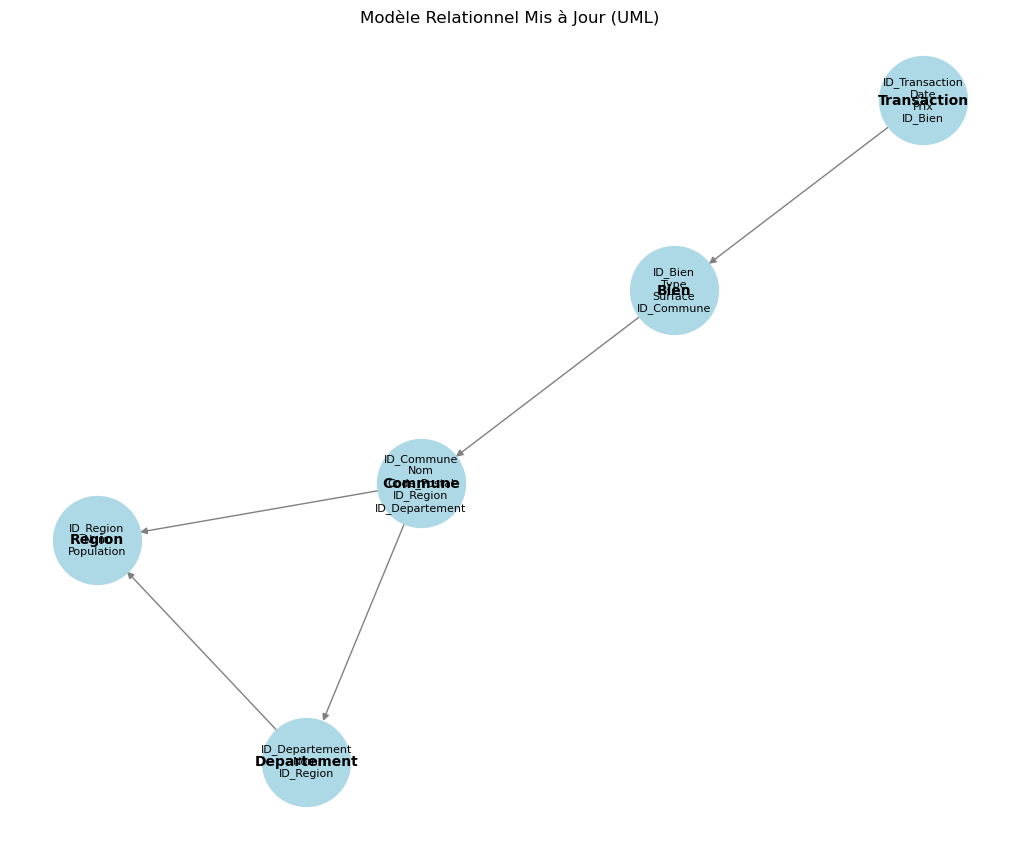

Le dictionnaire de données mis à jour est enregistré sous : updated_dictionnaire_des_donnees.xlsx
Le script SQL est enregistré sous : database_schema.sql


In [21]:
def main():
    file_path = "module-0201-template-du-dictionnaire-des-donnees-avril-2022.xlsx"
    updated_dict = update_data_dictionary(file_path)
    generate_relational_model()
    sql_script_path = generate_sql_script()

    print(f"Le dictionnaire de données mis à jour est enregistré sous : {updated_dict}")
    print(f"Le script SQL est enregistré sous : {sql_script_path}")

if __name__ == "__main__":
    main()